<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

(SOLUTIONS)
---

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Read in the dataset
data = pd.read_csv('datasets/boston.csv')

# we will only explore the NOX and AGE variables
NOX = data['NOX']
AGE = data['AGE']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

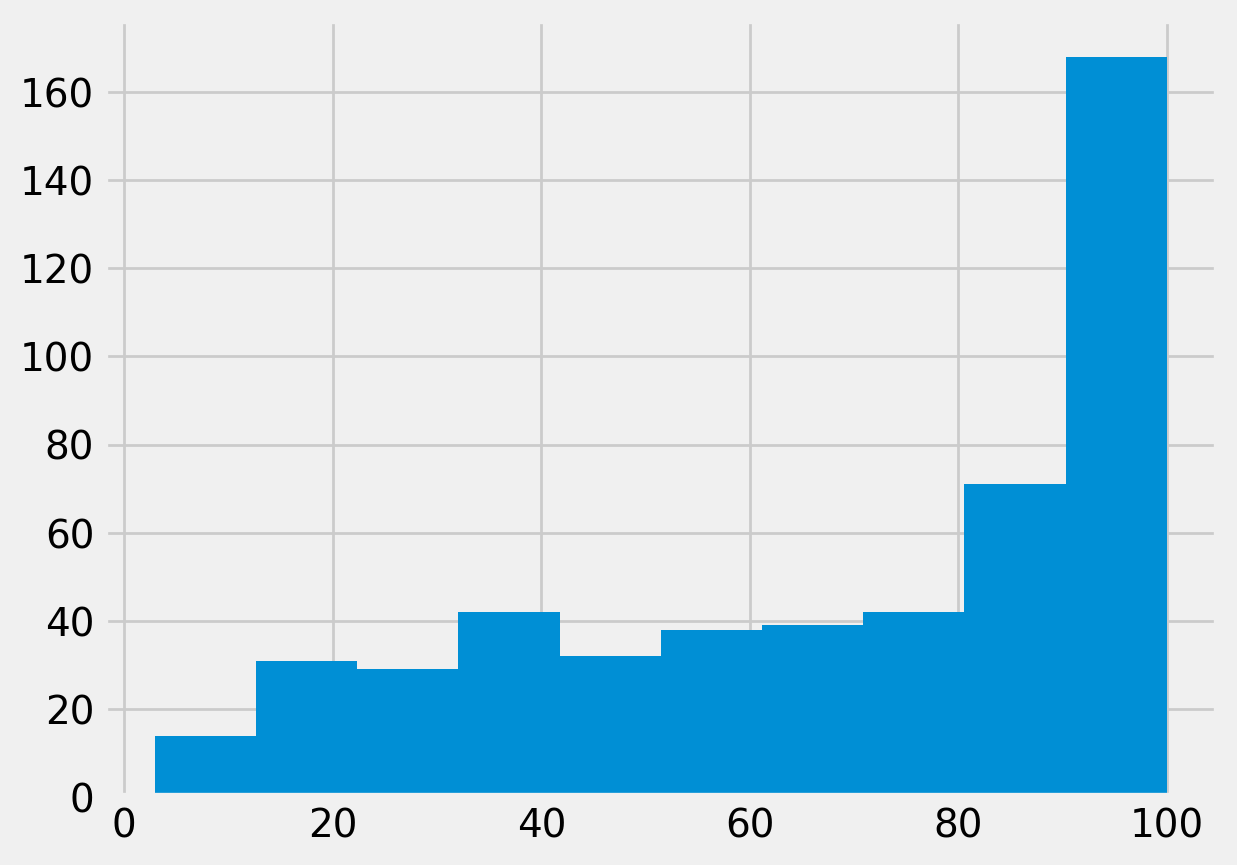

In [4]:
AGE.hist()

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [3]:
# A:
mean_age = AGE.mean()
sd_age = AGE.std()
sem_age = sd_age/np.sqrt(len(AGE))
print(f'mean age is {mean_age:.4f}')
print(f'std dev of age is {sd_age:.4f}')
print(f'std error of mean is {sem_age:.4f}')


mean age is 68.5749
std dev of age is 28.1489
std error of mean is 1.2514


In [4]:
# scipy standard error function
from scipy.stats import sem
sem(AGE)

1.2513695252583041

### 2. Generate a 90%, 95%, and 99% confidence interval for `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(confidence, df, loc=0, scale=1)	
```

Arguments:
- `confidence` = confidence level, between 0 and 1
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [5]:
from scipy.stats import t

In [6]:
# A: Test t.interval
t.interval(0.90, len(AGE)-1,loc=mean_age, scale=sem_age)

(66.51279866704189, 70.63700370449968)

In [7]:
# Write a function to calculate the confidence interval
def calculate_tinterval(confidence_level,vector):
    n = len(vector)
    t_interval = t.interval(confidence_level,
                           n-1,
                           loc=vector.mean(),
                           scale=vector.std()/n**0.5)
    return t_interval

In [8]:
for confidence_level in [0.9,0.95,0.99]:
    
    lower, upper = calculate_tinterval(confidence_level,AGE)

    print(f"We are {confidence_level*100}% confident that the true mean value for 'AGE' is between {lower:.2f} and {upper:.2f} years of age.")

We are 90.0% confident that the true mean value for 'AGE' is between 66.51 and 70.64 years of age.
We are 95.0% confident that the true mean value for 'AGE' is between 66.12 and 71.03 years of age.
We are 99.0% confident that the true mean value for 'AGE' is between 65.34 and 71.81 years of age.


### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

**A.** _Yes. We don't know whether or not 'AGE' is normally distributed (and by the plot below, it clearly is not), but since the size of our sample n is larger than 30, we can assume that the behavior of X-bar will be normal enough for us to use our t-distribution to generate our confidence intervals._

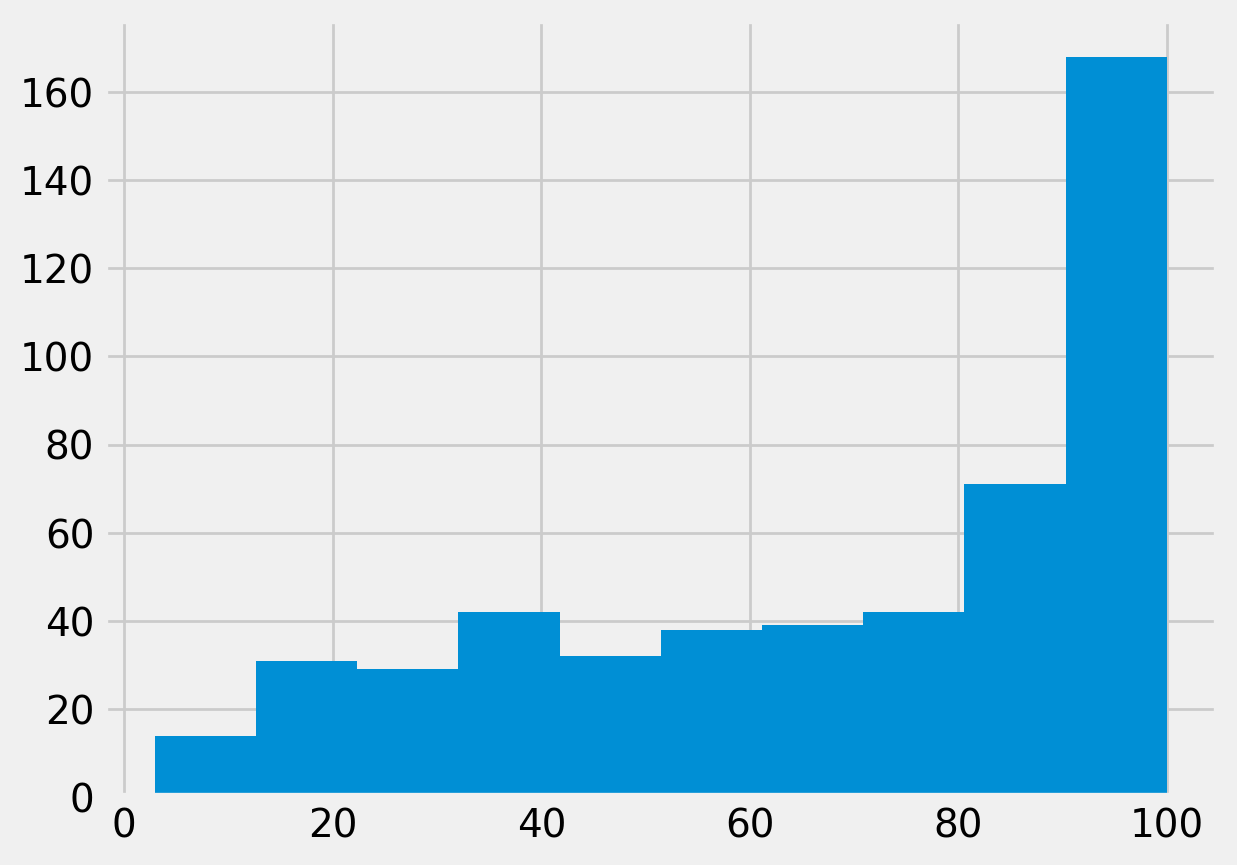

In [9]:
# A:
plt.hist(AGE)
plt.show()

### 4. For the variable `NOX`, generate a 95% confidence interval and interpret it.

In [10]:
# A:
lower, upper = calculate_tinterval(0.95,NOX)
print(f"We are 95% confident that the true mean value for 'NOX' is between {lower:.2f} and {upper:.2f} years of age.")

We are 95% confident that the true mean value for 'NOX' is between 0.54 and 0.56 years of age.


### 5. For the variable `NOX`, we are going to test the hypothesis that the (true) mean is equal to the sample median

In this case, we are performing the hypothesis test to test the mean based on a single sample.
These are the steps:
1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [11]:
# A:
## Step 1: Define hypotheses.
### H_0: mu_NOX = M_NOX
### H_A: mu_NOX != M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = NOX.mean()
sample_median = 0.54
sample_std = NOX.std()
sample_size = len(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(sample_std/sample_size**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = t.sf(np.abs(t_statistic), len(NOX)-1) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is {:.4f}.".format(0.54))
print("Our sample mean is {:.4f}.".format(sample_mean))
print("Our t-statistic is {:.6f}.".format(t_statistic))
print("Our p-value is {:.6f}.".format(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 0.5400.
Our sample mean is 0.5547.
Our t-statistic is 2.852639.
Our p-value is 0.004514.
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


** 1-sample t-test

To perform the t-test on a single sample, you can use `scipy.stats.ttest_1samp()`.

Try it out. Do you get the same values?

In [14]:
from scipy import stats

stats.ttest_1samp(NOX, sample_median)

Ttest_1sampResult(statistic=2.8526390677766322, pvalue=0.004513586425934958)

### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**


**A.** _When we calculated the median, it was 0.538. The 95% confidence interval for our mean contained 0.545 through 0.565. Since the median was outside our 95% confidence interval, this suggests that the true mean would not be equal to our median._

_We then conducted the hypothesis test and found that, at the alpha = 0.05 significance level, we rejected the hypothesis that the mean and median were equal._

_The results of our hypothesis test and confidence interval are in agreement here. Because our significance level (for HT) is alpha, as long as our confidence level (for CI) is 1 - alpha, the results should be in agreement.  
That is, if the value of interest does not lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should be rejected at the alpha significance level. Similarly, if the value of interest *does* lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should *not* be rejected at the alpha significance level._